# Text Classification: Name Gender

Here is a partition of the name gender data into training, dev-test, and test data as shown in the lectures:

In [3]:
import nltk
nltk.download('names')
from nltk.corpus import names
m = names.words('male.txt')
f = names.words('female.txt')

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\zhong\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!


In [4]:
import random
random.seed(1234) # Set the random seed to allow replicability
names = ([(name, 'male') for name in m] +
         [(name, 'female') for name in f])
random.shuffle(names)
train_names = names[1000:]
devtest_names = names[500:1000]
test_names = names[:500]

And here is one of the classifiers given in the lectures.

In [5]:
def gender_features2(word):
    return {'suffix1': word[-1:],
            'suffix2': word[-2:]}
train_set2 = [(gender_features2(n), g) for n, g in train_names]
devtest_set2 = [(gender_features2(n), g) for n, g in devtest_names]
classifier2 = nltk.NaiveBayesClassifier.train(train_set2)
nltk.classify.accuracy(classifier2, devtest_set2)

0.77

### Exercise: Using more information
Define a new function `gender_features5` that takes, as features, any suffixes of size 1, 2, 3, 4, and 5. Examine the accuracy results. What can you conclude from this new classifier?

In [6]:
def gender_features5(word):
    return {'suffix1': word[-1:],
            'suffix2': word[-2:],
            'suffix3': word[-3:],
            'suffix4': word[-4:],
            'suffix5': word[-5:]}
train_set5 = [(gender_features5(n), g) for n, g in train_names]
devtest_set5 = [(gender_features5(n), g) for n, g in devtest_names]
classifier5 = nltk.NaiveBayesClassifier.train(train_set5)
nltk.classify.accuracy(classifier5, devtest_set5) 

0.802

*(We observe an improvement in the accuracy, so it seems that the additional features are useful. But what happens if we use the new features only?)*

In [7]:
def gender_features3_5(word):
    return {'suffix3': word[-3:],
            'suffix4': word[-4:],
            'suffix5': word[-5:]}
train_set3_5 = [(gender_features3_5(n), g) for n, g in train_names]
devtest_set3_5 = [(gender_features3_5(n), g) for n, g in devtest_names]
classifier3_5 = nltk.NaiveBayesClassifier.train(train_set3_5)
nltk.classify.accuracy(classifier3_5, devtest_set3_5) 

0.786

*(We see that now the classifier has slightly worse results, so these new features are not to be used in isolation. We still need to keep the last two characters.)*

### Exercise: Plot the impact of the training size

The following code plots the classifier accuracy on the training and dev-test set as we increase the training size. Examine the plot and answer the following questions:

1. From what amount of training data you would judge that the system stops over-fitting?
2. From what amount of training data would you say that there is no need to add more training data?

In [6]:
train_accuracy2 = []
devtest_accuracy2 = []
nsamples = range(10, 500, 5)
for n in nsamples:
    classifier2 = nltk.NaiveBayesClassifier.train(train_set2[:n])
    train_accuracy2.append(nltk.classify.accuracy(classifier2, train_set2[:n]))
    devtest_accuracy2.append(nltk.classify.accuracy(classifier2, devtest_set2))

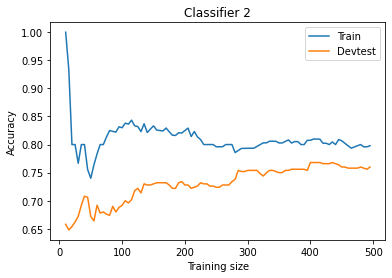

In [17]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(nsamples, train_accuracy2, label='Train')
plt.plot(nsamples, devtest_accuracy2, label='Devtest')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.title('Classifier 2')
plt.legend()

*(**Solution**: the plot shows that there is overfitting, and that the overfitting decreases as we increase the training size. The accuracy results do not change significantly from about 100 samples of training, so although there is overfitting, for practical purposes there is no need to use additional training data beyond 100 samples. This is a very small number of training samples because the number of features is very small, only 2 features.)*

### Exercise: Repeat the analysis using sk-learn

The lectures show how to use sklearn to implement the name classifier. Replicate the work in this workshop and try to answer the same questions as above.

1. Is it better to use the last two characters, or the last 5 characters?
2. From what amount of training data you would judge that the system stops overfitting?
3. From what amount of training data would you say that there is no need to add more training data?


In [8]:
from sklearn.naive_bayes import MultinomialNB
def one_hot_character(c):
    alphabet = 'abcdefghijklmnopqrstuvwxyz'
    result = [0]*(len(alphabet)+1)
    i = alphabet.find(c.lower())
    if i >= 0:
        result[i] = 1
    else:
        result[len(alphabet)] = 1 # character is out of the alphabet
    return result
def sk_gender_features2(word):
    "Return the one-hot encoding of the last two characters"
    assert len(word) >= 2
    last = one_hot_character(word[-1])
    secondlast = one_hot_character(word[-2])
    return secondlast + last

In [9]:
sk_train_set2 = [(sk_gender_features2(n), g) for n, g in train_names]
sk_devtest_set2 = [(sk_gender_features2(n), g) for n, g in devtest_names]
sk_classifier2 = MultinomialNB()
train2_X, train2_y = zip(*sk_train_set2)
sk_classifier2.fit(train2_X, train2_y)
devtest2_X, devtest2_y = zip(*sk_devtest_set2)

In [10]:
from sklearn.metrics import accuracy_score
devtest_predictions = sk_classifier2.predict(devtest2_X)
accuracy_score(devtest2_y, devtest_predictions)

0.752

In [12]:
def sk_gender_features5(word):
    "Return the one-hot encoding of the last 5 characters"
    features = []
    for i in range(5):
        if i <= len(word):
            features += one_hot_character(word[-i])
        else:
            features += one_hot_character(' ')
    return features

In [13]:
sk_gender_features5('Mary')

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [14]:
sk_train_set5 = [(sk_gender_features5(n), g) for n, g in train_names]
sk_devtest_set5 = [(sk_gender_features5(n), g) for n, g in devtest_names]
sk_classifier5 = MultinomialNB()
train5_X, train5_y = zip(*sk_train_set5)
sk_classifier5.fit(train5_X, train5_y)
devtest5_X, devtest5_y = zip(*sk_devtest_set5)
devtest5_predictions = sk_classifier5.predict(devtest5_X)
accuracy_score(devtest5_y, devtest5_predictions)

0.786

*(We also observe an improvement in the results when using last 5 characters)*

In [15]:
train_accuracy2 = []
devtest_accuracy2 = []
nsamples = range(10, 500, 5)
for n in nsamples:
    classifier2 = MultinomialNB()
    classifier2.fit(train2_X[:n], train2_y[:n])
    train_predictions = classifier2.predict(train2_X[:n])
    train_accuracy2.append(accuracy_score(train2_y[:n], train_predictions))
    devtest_predictions = classifier2.predict(devtest2_X)
    devtest_accuracy2.append(accuracy_score(devtest2_y, devtest_predictions))

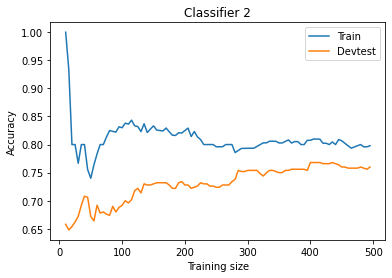

In [18]:
plt.plot(nsamples, train_accuracy2, label='Train')
plt.plot(nsamples, devtest_accuracy2, label='Devtest')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.title('Classifier 2')
plt.legend()

In [19]:
train_accuracy5 = []
devtest_accuracy5 = []
nsamples = range(10, 500, 5)
for n in nsamples:
    classifier5 = MultinomialNB()
    classifier5.fit(train5_X[:n], train5_y[:n])
    train_predictions = classifier5.predict(train5_X[:n])
    train_accuracy5.append(accuracy_score(train5_y[:n], train_predictions))
    devtest_predictions = classifier5.predict(devtest5_X)
    devtest_accuracy5.append(accuracy_score(devtest5_y, devtest_predictions))

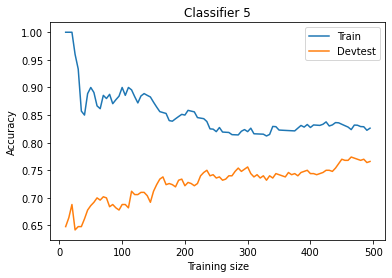

In [20]:
plt.plot(nsamples, train_accuracy5, label='Train')
plt.plot(nsamples, devtest_accuracy5, label='Devtest')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.title('Classifier 5')
plt.legend()

*(We observe that classifier 5 overfits more but the results on the development set are better anyway). We also observe that we could add more training data, especially for classifier 5.)*